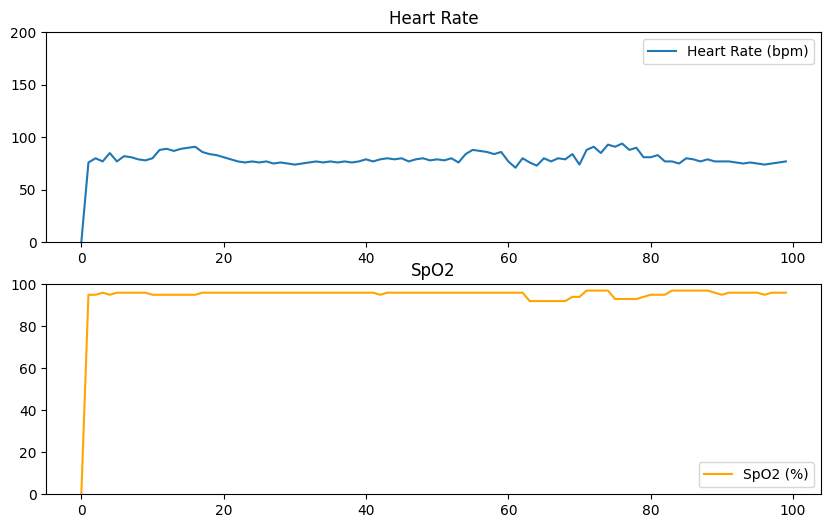

In [ ]:
# Heart Rate and SpO2 graphs

import serial
import matplotlib.pyplot as plt
from collections import deque
from IPython.display import display, clear_output
import time

ser = serial.Serial('/dev/ttyUSB1', 115200)  
print("Serial open:", ser.is_open)
print("Port name:", ser.port)

buffer_hr = deque([0]*100, maxlen=100)
buffer_spo2 = deque([0]*100, maxlen=100)

plt.ion()
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 6))

line_hr, = ax1.plot(buffer_hr, label="Heart Rate (bpm)")
line_spo2, = ax2.plot(buffer_spo2, label="SpO2 (%)", color='orange')

ax1.set_ylim(0, 200)
ax2.set_ylim(0, 100)

ax1.set_title("Heart Rate")
ax2.set_title("SpO2")

ax1.legend()
ax2.legend()

while True:
    try:
        raw_line = ser.readline().decode().strip()
        print(f"Raw line: {raw_line}")

        if "," in raw_line:
            hr_str, spo2_str = raw_line.split(",")
            if hr_str.isdigit() and spo2_str.isdigit():
                hr = int(hr_str)
                spo2 = int(spo2_str)

                buffer_hr.append(hr)
                buffer_spo2.append(spo2)

                line_hr.set_ydata(buffer_hr)
                line_spo2.set_ydata(buffer_spo2)

                line_hr.set_xdata(range(len(buffer_hr)))
                line_spo2.set_xdata(range(len(buffer_spo2)))

                ax1.relim()
                ax1.autoscale_view()
                ax2.relim()
                ax2.autoscale_view()

                clear_output(wait=True)
                display(fig)
                plt.pause(0.01)

    except KeyboardInterrupt:
        ser.close()
        break


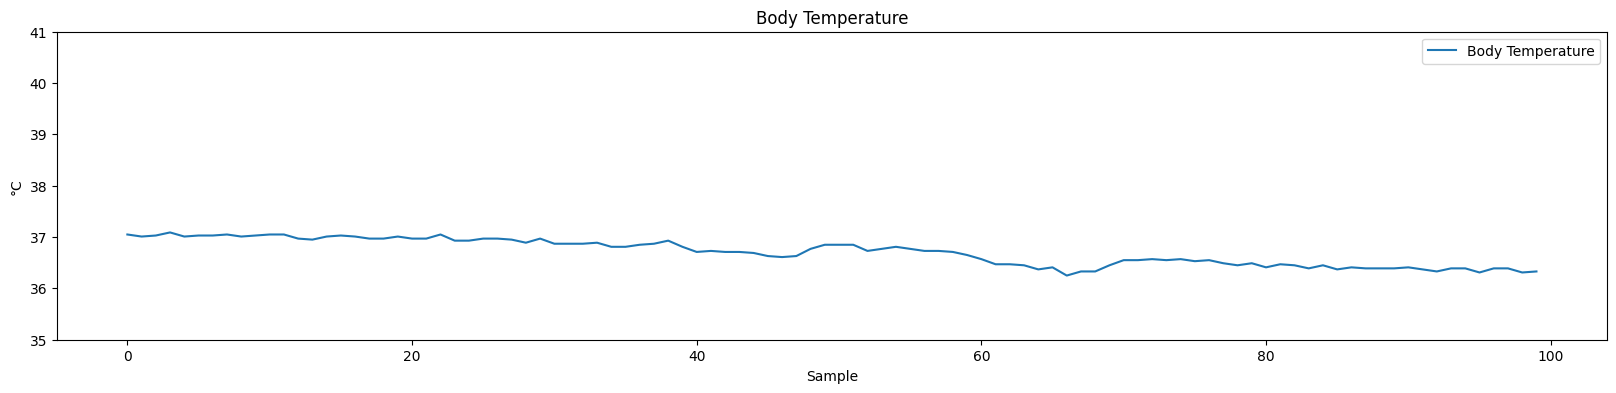

Raw line: I (1470197) SCREEN: Screen turned off due to inactivity
Không phải dữ liệu nhiệt độ: I (1470197) SCREEN: Screen turned off due to inactivity
Raw line: I (1478717) SCREEN: Screen turned on due to button press
Không phải dữ liệu nhiệt độ: I (1478717) SCREEN: Screen turned on due to button press
Raw line: I (1478717) UI_MANAGER: Button 1 pressed in state 5
Không phải dữ liệu nhiệt độ: I (1478717) UI_MANAGER: Button 1 pressed in state 5
Raw line: I (1478717) UI_MANAGER: Back to menu from temp
Không phải dữ liệu nhiệt độ: I (1478717) UI_MANAGER: Back to menu from temp
Raw line: I (1478717) UI_MANAGER: Switched to state 1
Không phải dữ liệu nhiệt độ: I (1478717) UI_MANAGER: Switched to state 1
Raw line: I (1480037) UI_MANAGER: Button 3 pressed in state 1
Không phải dữ liệu nhiệt độ: I (1480037) UI_MANAGER: Button 3 pressed in state 1
Raw line: I (1480037) UI_MANAGER: Menu down: index = 1
Không phải dữ liệu nhiệt độ: I (1480037) UI_MANAGER: Menu down: index = 1
Raw line: I (1480277)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd5 in position 45: invalid continuation byte

In [14]:
import serial
import matplotlib.pyplot as plt
from collections import deque
from IPython.display import display, clear_output
import time

ser = serial.Serial('/dev/ttyUSB0', 115200)  
print("Serial open:", ser.is_open)
print("Port name:", ser.port)

buffer_temp = deque([0]*100, maxlen=100)

plt.ion()
fig, ax1 = plt.subplots(figsize=(20, 4))

line_temp, = ax1.plot(buffer_temp, label="Body Temperature")

ax1.set_ylim(35, 41)

ax1.set_title("Body Temperature")
ax1.set_ylabel("°C")
ax1.set_xlabel("Sample")
ax1.legend()

while True:
    try:
        raw_line = ser.readline().decode().strip()
        print(f"Raw line: {raw_line}")

        try:
            temp = float(raw_line)
            buffer_temp.append(temp)

            line_temp.set_ydata(buffer_temp)
            line_temp.set_xdata(range(len(buffer_temp)))

            ax1.relim()
            ax1.autoscale_view()

            clear_output(wait=True)
            display(fig)
            plt.pause(0.01)

        except ValueError:
            print("Không phải dữ liệu nhiệt độ:", raw_line)

    except KeyboardInterrupt:
        print("Đóng serial")
        ser.close()
        break
